# Data wrangling WeRateDogs

##### By Thanh Dinh

<a id='intro'></a>
## Introduction



The purpose of this project is to put in practice what I learned in data wrangling data section from Udacity Data Analysis Nanodegree program. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

<a id='gather'></a>
## 1.Gathering data

1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
from nltk import pos_tag

**1.Twitter archive file**

In [18]:
archive_file = pd.read_csv('twitter-archive-enhanced.csv')
archive_file.set_index('tweet_id', inplace = True)
archive_file.head(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2. The tweet image predictions**

In [19]:
tsv_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(tsv_url)

with open(tsv_url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    
images_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
images_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3.Twitter API & JSON**

In [20]:
consumer_key = "tFTmXQsPQMczTORdiYvbEZ5QL"
consumer_secret = "FUqXd7GMhBVEpgUBFwV5hAAAU3nF8OhrYrfedU0tolKohbzvIM"
access_token = "63011261-kYCkcp9eZpCyT9eZ97SPHJg96m5IxFd97wHCvxquo"
access_token_secret = "6M4HkAdormqRxSdUVAxq16XQP5pllnJMv5erBErwZHBBm"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [5]:
#Download to a df_list
df_list = []
e_list = []
tweet_id = images_prediction['tweet_id']

for id in tweet_id:
    try:
        page = api.get_status(id)
        favorites = page['favorite_count']
        retweet_count = page['retweet_count']
        day_time = pd.to_datetime(page['created_at'])
        df_list.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweet_count': int(retweet_count)})
    
    except Exception as e:
        e_list.append(id)

Writing json data

In [21]:
df_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet_count'])
df_json.set_index('tweet_id', inplace = True)
df_json.to_csv('tweet_json.txt', encoding = 'utf-8')

Checking the json table

In [22]:
df_json.head()

,favorites,retweet_count
tweet_id,,
666020888022790149,2535,507
666029285002620928,128,47
666033412701032449,124,43
666044226329800704,296,139
666049248165822465,108,41


Data combination from three sources and copy unclean data:

In [23]:
images_prediction.set_index('tweet_id', inplace = True)
df = pd.merge(left=archive_file, right=images_prediction, left_index=True, right_index=True, how='left')
df = pd.merge(left=df, right=df_json, left_index=True, right_index=True, how='left')
df.to_csv('df_combined.csv', encoding = 'utf-8')
df.to_csv('df_combined_copy.csv', encoding = 'utf-8') #Copy the raw file before cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       2075 non-null object


<a id='gather'></a>
## 2. Data Wrangling

In [24]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tweepy
import json
import re
from nltk import pos_tag

Print function ready to serve.


In [26]:
df = pd.read_csv('df_combined.csv') #read merged file


VISUAL AND PROGRAMMATIC ASSESSMENT


In [27]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorites,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38159.0,8349.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32729.0,6171.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24640.0,4082.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41497.0,8486.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39669.0,9185.0


In [159]:
df.dtypes.index

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorites', 'retweet_count'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       2075 non-null object


In [18]:
df.shape

(2356, 29)

In [17]:
df.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorites,retweet_count
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2068.000000,2068.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,1.203855,0.594548,1.345886e-01,6.032417e-02,8443.148453,2815.895551
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,0.561875,0.271174,1.006657e-01,5.090593e-02,12707.327833,4894.175686
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,12.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,1605.500000,599.250000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,3715.000000,1324.500000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,10572.750000,3251.250000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,164748.000000,83940.000000


In [20]:
#Counting rate 
df['rating_numerator'].value_counts()
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Counting dog name:

In [21]:
df.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
Sadie            8
the              8
Daisy            7
an               7
Toby             7
Buddy            7
Bailey           7
Oscar            6
Koda             6
Scout            6
Leo              6
Jax              6
Jack             6
Stanley          6
Bella            6
Dave             6
Milo             6
Rusty            6
Alfie            5
              ... 
Beckham          1
Chadrick         1
Naphaniel        1
Dante            1
Ashleigh         1
Josep            1
Bloop            1
Harnold          1
Jordy            1
Brudge           1
Tycho            1
Rolf             1
Jaycob           1
Tuco             1
Ruffles          1
Zeus             1
Lucia            1
Anthony          1
Clarkus          1
Simba            1
Billl            1
Geoff       

QUALITY AND TIDINESS ISSUES

1. Quality:


1.1. Remove Retweets and Tweets without Pictures

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       2075 non-null object


In [29]:
df = df[pd.notnull(df['jpg_url'])] #without pics
df = df[pd.isnull(df['retweeted_status_id'])] #additional retweets
#len(df['text'])

Check the output:

In [30]:
len(df['text']) #test

1994

1.2. Remove Redundant Columns

In [31]:
del df['retweeted_status_id'] 
del df['retweeted_status_user_id']
del df['retweeted_status_timestamp'] #code


Checking the reduntanted list:

In [32]:
list(df) #test

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweet_count']

1.3. Convert Timestamp to a Datetime

Review the current timestamp

In [32]:
df.timestamp.head() 

tweet_id
892420643555336193    2017-08-01 16:23:56 +0000
892177421306343426    2017-08-01 00:17:27 +0000
891815181378084864    2017-07-31 00:18:03 +0000
891689557279858688    2017-07-30 15:58:51 +0000
891327558926688256    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp']) # code

Checking the output

In [34]:
df.timestamp.head() #test

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

1.4. Sort out dog type Columns and delete unused dog types defined:

In [39]:
list(df)

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorites',
 'retweet_count']

In [35]:
#code
dog_type = []

string_in = ['puppo', 'pupper', 'doggo', 'floof']
string_out = ['puppo', 'pupper', 'doggo', 'floofer']

for row in df['text']:
    row = row.lower()
    for word in string_in:
        if word in str(row):
            dog_type.append(string_out[string_in.index(word)])
            break
    else:
        dog_type.append('None')

df['dog_type'] = dog_type


In [37]:
df['dog_type'].value_counts() #test

None       1625
pupper      237
doggo        69
floofer      34
puppo        29
Name: dog_type, dtype: int64

In [38]:
#Delete redundant columns
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True) #code

Checking the output:

In [39]:
df.dtypes.index #test

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorites', 'retweet_count', 'dog_type'],
      dtype='object')

1.5.Parse Dog Rates and Dog Count before get rid of rating_numerator and ating_denominator

In [41]:
#code
rates = []

extract_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))

df['text'].apply(extract_rates)

numerator = []
dog_count = []

for item in rates:
    
    # for tweets with no rating, but a picture, so a dog
    if len(item) == 0:
        numerator.append('NaN')
        dog_count.append(1)
        
    # for tweetss with one rating and one dog
    elif len(item) == 1 and item[0][-1] == '10':
        numerator.append(float(item[0][0]))
        dog_count.append(1)
   
    # for group ratings
    elif len(item) == 1: 
        avg = float(item[0][0]) / (float(item[0][-1]) / 10) 
        numerator.append(avg)
        dog_count.append(float(item[0][-1]) / 10)
   
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        list = []
        for i in range(len(item)):
            if item[i][-1] == '10': #one tweet has the phrase '50/50' so I'm coding to exclude it
                list.append(item[i])
        for rate in list:
            total = total + float(rate[0])
        avg = total / len(item)
        numerator.append(avg)
        dog_count.append(len(item))
   
    # in order to catch bugs
    else:
        numerator.append('Not parsed')
        dog_count.append('Not parsed') 
        
df['rating'] = numerator # no need to also add denominator since they are all 10!
df['dog_count'] = dog_count

In [42]:
df['rating'].value_counts() #test

12.0                 453
10.0                 411
11.0                 399
13.0                 261
9.0                  152
8.0                   94
7.0                   52
14.0                  36
6.0                   32
5.0                   30
3.0                   19
4.0                   14
2.0                    9
1.0                    4
8.5                    4
7.5                    3
9.5                    3
5.5                    2
6.5                    2
10.5                   2
0.0                    2
1776.0                 1
9.75                   1
9.666666666666666      1
4.5                    1
NaN                    1
11.27                  1
13.5                   1
420.0                  1
11.5                   1
11.26                  1
Name: rating, dtype: int64

In [43]:
# All are below 14 except the joke ratings of 420 and 1776, so success
df.drop([ 'rating_numerator', 'rating_denominator'], axis=1, inplace=True) #code


Checking the results:

In [44]:
df.dtypes.index

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorites', 'retweet_count', 'dog_type', 'rating',
       'dog_count'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 892420643555336193 to 666020888022790149
Data columns (total 23 columns):
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf                  1994 non-null float64
p3_dog                   1994 non-null object
favorites               

In [45]:
df['dog_count'].value_counts()#test

1.0     1958
2.0       23
5.0        2
8.0        2
3.0        1
12.0       1
11.0       1
13.0       1
4.0        1
9.0        1
17.0       1
15.0       1
7.0        1
Name: dog_count, dtype: int64

1.6. Get rid of name issue: A lot of dog names "a". That is not made sense

In [55]:
df.name.value_counts() 

None         546
a             55
Charlie       11
Cooper        10
Oliver        10
Lucy          10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           7
Daisy          7
Toby           7
the            7
Koda           6
an             6
Stanley        6
Bella          6
Jax            6
Bo             6
Milo           5
Bailey         5
Rusty          5
Buddy          5
Chester        5
Scout          5
Oscar          5
Dave           5
Leo            5
Louis          5
            ... 
Cermet         1
Aldrick        1
Trigger        1
Major          1
Horace         1
Fred           1
Chelsea        1
Philbert       1
Gerbald        1
Noosh          1
Coopson        1
Eve            1
Miguel         1
Gòrdón         1
Pete           1
Tito           1
Hanz           1
Maxwell        1
Baloo          1
Ginger         1
Hurley         1
Ozzy           1
Jessiga        1
Snickers       1
Apollo         1
Rooney         1
Sid            1
Sobe          

Dog's name need to be extracted:

In [46]:
df['text_split'] = df['text'].str.split() #text processing

In [48]:
# use string starts with method to clean this up - code
names = []

def extract_names(row):
    
    # 'This is Charlie'
    if row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Meet Charlie'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
    
    # 'Say hello to Charlie'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Here we have Charlie'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'named Charlie'           
    elif 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
            
    else:
        names.append('Nameless')
        
        
df.apply(extract_names, axis=1)

len(names)
df['names'] = names


Checking the results:

In [49]:
df['names'].value_counts() #test

Nameless     625
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           7
Daisy          7
Jax            6
Toby           6
Bo             6
Bella          6
Stanley        6
Koda           6
Leo            5
Louis          5
Milo           5
Chester        5
Rusty          5
Buddy          5
Oscar          5
Bailey         5
Scout          5
Alfie          4
Clark          4
Oakley         4
Bear           4
            ... 
Hero           1
Berkeley       1
Tug            1
Blitz          1
Cilantro       1
Tuco           1
Blanket        1
Rizzo          1
Cora           1
Tebow          1
Chloe          1
Sparky         1
Arnold         1
Maude          1
Callie         1
Leroi.         1
Chevy          1
Schnitzel      1
Furzey         1
Godi           1
Maxwell        1
Dutch          1
Jessifer       1
Edgar          1
Carll          1
Siba           1
Pepper         1
Noah          

1.7. Set Null Values in Various Columns

In [53]:
#code
df.loc[df['names'] == 'Nameless', 'names'] = None
df.loc[df['dog_type'] == 'None', 'dog_type'] = None
df.loc[df['rating'] == 0.0, 'rating'] = np.nan

In [54]:
df.info()#test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 26 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3                       1994 non-null object
p3_conf                  1994 non-null float64
p3_dog                   1994 non-null object
favorites 

1.8.Create a Hashtag Column: One of the most Tweet's interesting is hashtag. So, it need to be extracted:

In [55]:
df['hashtag'] = df['text'].str.extract(r"#(\w+)", expand=True) #code
df['hashtag'].value_counts()

BarkWeek                 8
PrideMonth               3
WomensMarch              1
FinalFur                 1
PrideMonthPuppo          1
NoDaysOff                1
K9VeteransDay            1
Canada150                1
notallpuppers            1
WKCDogShow               1
dogsatpollingstations    1
BellLetsTalk             1
ScienceMarch             1
Name: hashtag, dtype: int64

TIDINESS ISSUES


In [ ]:
2.1.Dog breed analysis 

In [56]:
breed = []
confidence = []

def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)
      
df.apply(breed_confidence, axis=1)
df['breed'] = breed
df['confidence'] = confidence

In [59]:
df.head(5) #test

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,...,favorites,retweet_count,dog_type,rating,dog_count,text_split,names,hashtag,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,...,38159.0,8349.0,None,13,1.0,"[This, is, Phineas., He's, a, mystical, boy., ...",Phineas,NaN,Unidentifiable,0.000000
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,...,32729.0,6171.0,None,13,1.0,"[This, is, Tilly., She's, just, checking, pup,...",Tilly,NaN,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,...,24640.0,4082.0,None,12,1.0,"[This, is, Archie., He, is, a, rare, Norwegian...",Archie,NaN,Chihuahua,0.716012
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,...,41497.0,8486.0,None,13,1.0,"[This, is, Darla., She, commenced, a, snooze, ...",Darla,NaN,Labrador_retriever,0.168086
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,...,39669.0,9185.0,None,12,1.0,"[This, is, Franklin., He, would, like, you, to...",Franklin,BarkWeek,basset,0.555712


In [60]:
#After playing around with those fields above, we can get rid of them
df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True) #code

In [62]:
df.info() #test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
favorites                1993 non-null float64
retweet_count            1993 non-null float64
dog_type                 369 non-null object
rating                   1992 non-null object
dog_count                1994 non-null float64
text_split               1994 non-null object
names                    1369 non-null object
hashtag                  22 non-null object
breed                    1994 non-null object
confidence   

2.2. Combined three sources ( which has been done in Data gathering. I did it in order to made the context of data cleaning more clear)

In [63]:
#Saving final cleaned data to file:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

# ANALYSE

In [64]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime as dt
matplotlib.style.use('seaborn-whitegrid')
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)


Text(0,0.5,'Count')

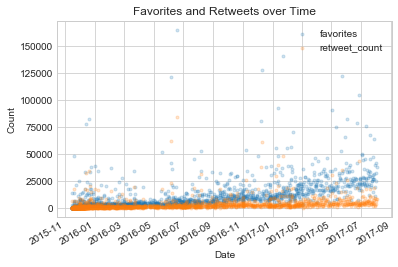

In [65]:
#Retweets, Favorites and Ratings Correlation
df[['favorites', 'retweet_count']].plot(style = '.', alpha = .2)
plt.title('Favorites and Retweets over Time')
plt.xlabel('Date')
plt.ylabel('Count')

Here you can see the gradual incline of both favorites and retweets. From my point of view, increment of values over the time just because of the increment of tweet's users


In [80]:
df.shape

(1994, 19)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1994 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 19 columns):
tweet_id         1994 non-null int64
source           1994 non-null object
text             1994 non-null object
expanded_urls    1994 non-null object
name             1994 non-null object
doggo            1994 non-null object
floofer          1994 non-null object
pupper           1994 non-null object
puppo            1994 non-null object
jpg_url          1994 non-null object
img_num          1994 non-null float64
favorites        1993 non-null float64
retweet_count    1993 non-null float64
breed            1686 non-null object
confidence       1686 non-null float64
rating           1991 non-null float64
dog_count        1994 non-null float64
dog_type         369 non-null object
names            0 non-null float64
dtypes: float64(7), int64(1), object(11)
memory usage: 311.6+ KB


Text(0,0.5,'Rating')

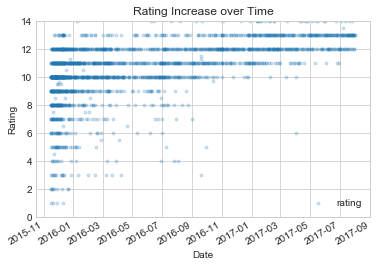

In [89]:
df.plot(y ='rating', ylim=[0,14], style = '.', alpha = .2)
plt.title('Rating Increase over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

The rating is geting higher. Again, I do not think just because of the quality of dogs. Just about a number of followers

In [92]:
df[['favorites', 'retweet_count', 'rating']].corr(method='pearson')

,favorites,retweet_count,rating
favorites,1.000000,0.929691,0.021942
retweet_count,0.929691,1.000000,0.022585
rating,0.021942,0.022585,1.000000


Text(0,0.5,'Breed')

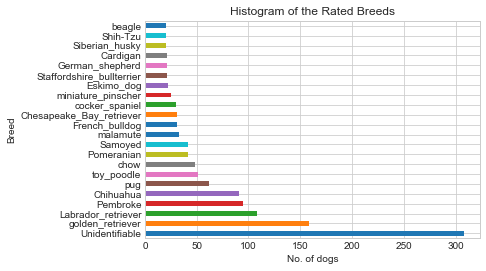

In [93]:
top_breeds=df.groupby('breed').filter(lambda x: len(x) >= 20)
top_breeds['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Rated Breeds')
plt.xlabel('No. of dogs')
plt.ylabel('Breed')

Golden retriever is the most common dog in this dataset. But, one point need to be aware that, there is quite a lot of "Undentifiable" Rates Breeds

In [198]:
df.groupby('dog_type')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,69.0,11.797101,1.510548,8.0,11.0,12.0,13.0,14.0
floofer,34.0,11.705882,0.759961,10.0,11.0,12.0,12.0,13.0
pupper,237.0,10.616160,1.833623,3.0,10.0,11.0,12.0,14.0
puppo,29.0,12.172414,1.197288,9.0,12.0,13.0,13.0,14.0


So puppers are getting much lower rates than the other dog types. Their median is lower and they have several low outliers. This makes sense since 'pupper' can be used to describe irresponsible dogs.

Floofers are consistently rated above 10. I wonder if that is because they are always awesome or if it is based on time. We know that the ratings have been getting higher. If 'floof' is a newer term, only used in newer tweets, that might explain the consistently higher rates.


In [200]:
df['rating'].describe()

count    1991.000000
mean       11.647638
std        40.668547
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

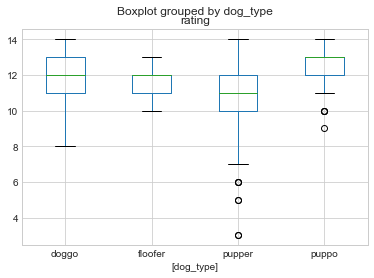

In [94]:
df.boxplot(column=['rating'], by=['dog_type'])


The boxplot shows that outliner in dog_type rate, which might need to get rid of from dataset

In [95]:
df[df['rating'] <= 14]['rating'].describe()

count    1989.000000
mean       10.555277
std         2.157977
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

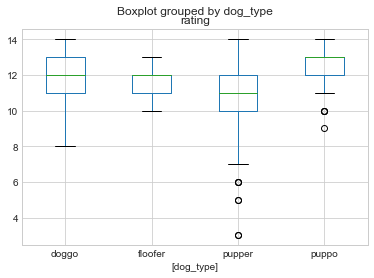

In [96]:
df.boxplot(column=['rating'], by=['dog_type'])